Nama : Nadilla Nur 'Aini Yulian Putri

Kode Peserta : PYTN-KS15-012

Kelas : Introduction to Python for Data Science (Studi Independent)

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t

## Load Dataset

In [2]:
rideshare = pd.read_csv('dataset\\nyc-rolling-sales.csv')

In [3]:
df = pd.read_csv('dataset\\nyc-rolling-sales.csv')
df.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
print(df.columns)
print(df.shape)

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')
(84548, 22)


In [5]:
# Check for missing values
print(df.isnull().sum())

df.dtypes

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64


Unnamed: 0                         int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

Perlu untuk mengubah format 'sale price' ke 'int64' agar lebih mudah untuk di olah dan kita hilangkan baris yang memiliki nilai 0 pada kolom tersebut.

In [6]:
cols_to_convert = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']
cols_to_convert2 = ['SALE DATE']

# Convert the object columns to int64 datatype
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype('int64')

for col in cols_to_convert2:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df = df[df["SALE PRICE"] != 0]

In [7]:
print(df.dtypes)

Unnamed: 0                                 int64
BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
EASE-MENT                                 object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                   int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                           int64
GROSS SQUARE FEET                          int64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE          

In [8]:
df_new = df.select_dtypes(include=['int64'])

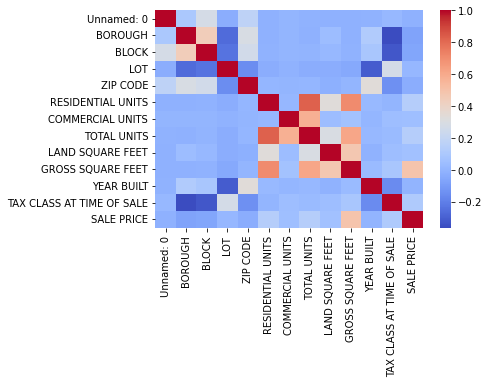

In [9]:
# Calculate the correlation matrix
corr = df_new.corr()

# Generate a heatmap using Seaborn
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')

# Show the plot
plt.show()

### PENJELASAN
Dari heatmap dapat diketahui bahwa:
'TOTAL UNITS' berkorelasi kuat dengan 'RESIDENTIAL UNITS' yang menunjukan bahwa pada dataset residential unit menyumbang jumlah paling besar pada total unit, lalu diikuti korelasi kuat oleh 'gross square feet' dengan 'residential unit', serta 'total unit' dan 'gross square unit'.

## Measure of central tendency (Mean, Median, Modus)

In [10]:
for column in df_new:
  mean = df_new[column].mean()
  median = df_new[column].median()
  modus = df_new[column].mode()[0]

  print(f"Column: {column}")
  print(f"Mean: {mean:.2f}")
  print(f"Median: {median:.2f}")
  print(f"Mode: {modus:.2f}")
  print(" ")

Column: Unnamed: 0
Mean: 10300.06
Median: 9032.00
Mode: 7.00
 
Column: BOROUGH
Mean: 2.94
Median: 3.00
Mode: 4.00
 
Column: BLOCK
Mean: 4151.62
Median: 3167.00
Mode: 5066.00
 
Column: LOT
Mean: 390.77
Median: 50.00
Mode: 1.00
 
Column: ZIP CODE
Mean: 10705.74
Median: 11207.00
Mode: 10314.00
 
Column: RESIDENTIAL UNITS
Mean: 1.73
Median: 1.00
Mode: 1.00
 
Column: COMMERCIAL UNITS
Mean: 0.16
Median: 0.00
Mode: 0.00
 
Column: TOTAL UNITS
Mean: 1.90
Median: 1.00
Mode: 1.00
 
Column: LAND SQUARE FEET
Mean: 2437.37
Median: 1056.00
Mode: 0.00
 
Column: GROSS SQUARE FEET
Mean: 2274.16
Median: 0.00
Mode: 0.00
 
Column: YEAR BUILT
Mean: 1810.11
Median: 1940.00
Mode: 0.00
 
Column: TAX CLASS AT TIME OF SALE
Mean: 1.63
Median: 2.00
Mode: 2.00
 
Column: SALE PRICE
Mean: 1494927.31
Median: 625500.00
Mode: 10.00
 


## Measure of Spread (range, varian, standar deviasi)

In [11]:
for column in df_new:
  min_val = df_new[column].min()
  max_val = df_new[column].max()
  range_val = max_val - min_val
  variance = df_new[column].var()
  std_dev = df_new[column].std()

  print(f"Column: {column}")
  print(f"Range: {range_val:.2f}")
  print(f"Variance: {variance:.2f}")
  print(f"Standard Deviation: {std_dev:.2f}")
  print(" ")

Column: Unnamed: 0
Range: 26734.00
Variance: 50241340.25
Standard Deviation: 7088.11
 
Column: BOROUGH
Range: 4.00
Variance: 1.76
Standard Deviation: 1.33
 
Column: BLOCK
Range: 16318.00
Variance: 12737356.86
Standard Deviation: 3568.94
 
Column: LOT
Range: 9105.00
Variance: 450032.04
Standard Deviation: 670.84
 
Column: ZIP CODE
Range: 11694.00
Variance: 1597944.19
Standard Deviation: 1264.10
 
Column: RESIDENTIAL UNITS
Range: 1844.00
Variance: 200.49
Standard Deviation: 14.16
 
Column: COMMERCIAL UNITS
Range: 2261.00
Variance: 96.46
Standard Deviation: 9.82
 
Column: TOTAL UNITS
Range: 2261.00
Variance: 300.60
Standard Deviation: 17.34
 
Column: LAND SQUARE FEET
Range: 4252327.00
Variance: 1311533837.94
Standard Deviation: 36215.11
 
Column: GROSS SQUARE FEET
Range: 3750565.00
Variance: 578605408.98
Standard Deviation: 24054.22
 
Column: YEAR BUILT
Range: 2017.00
Variance: 255778.88
Standard Deviation: 505.75
 
Column: TAX CLASS AT TIME OF SALE
Range: 3.00
Variance: 0.50
Standard Dev

## Peluang Distribusi

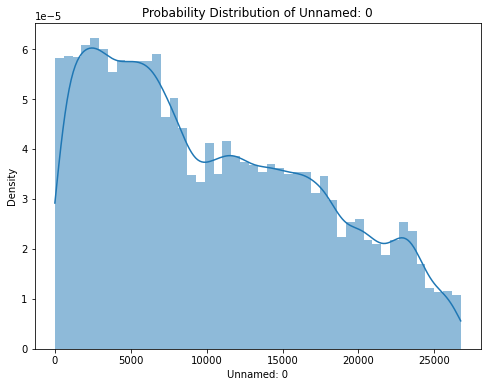

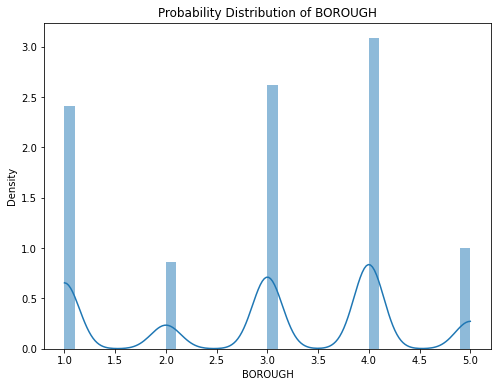

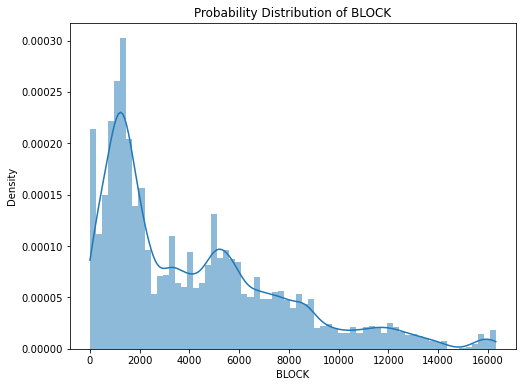

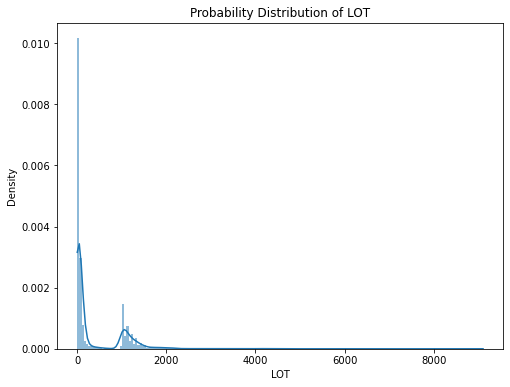

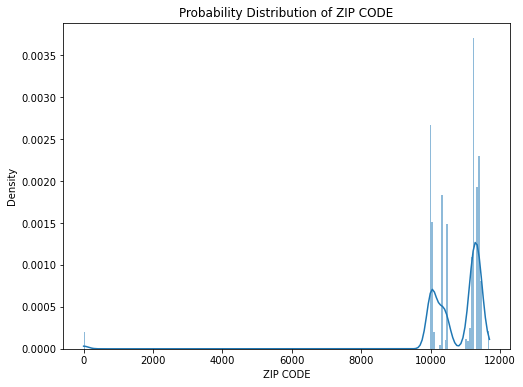

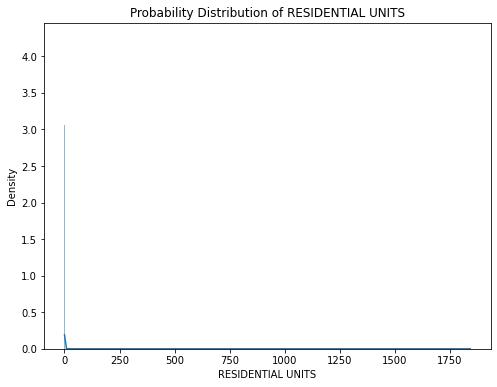

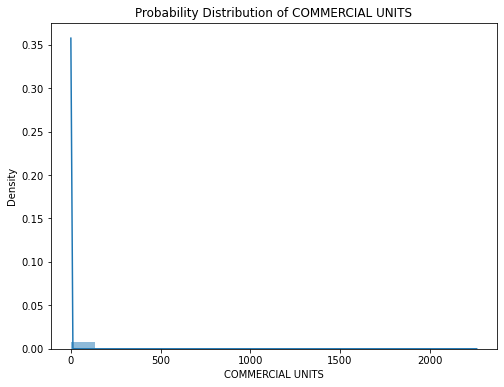

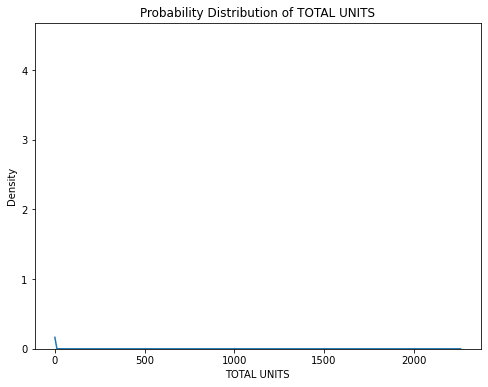

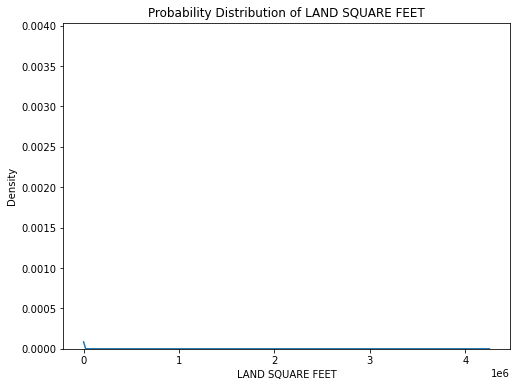

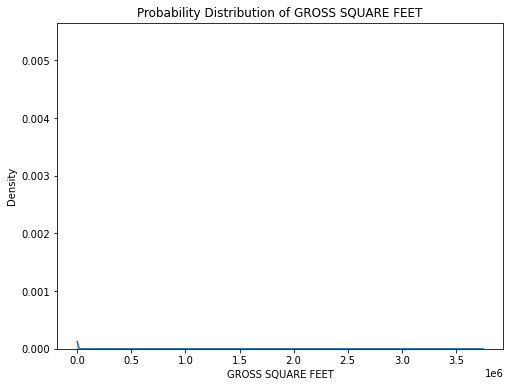

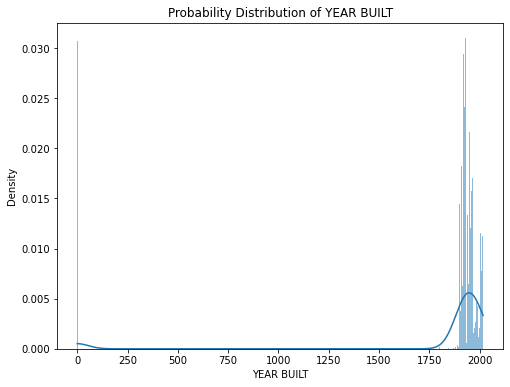

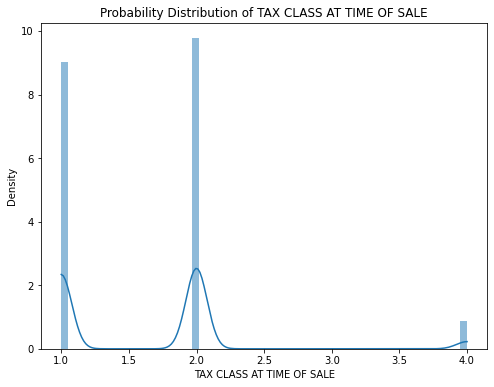

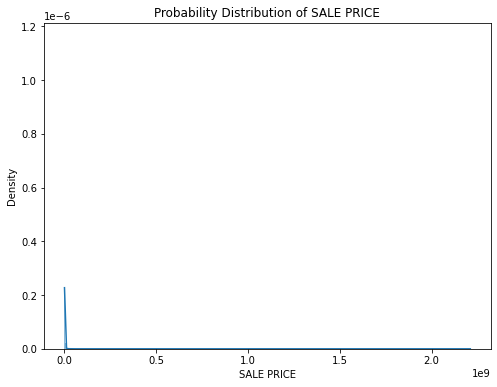

In [12]:
# Loop through the columns and create a histogram
for col in df_new:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df_new, x=col, kde=True, stat="density", linewidth=0)
    plt.title("Probability Distribution of {}".format(col))
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

## Confidence Interval

In [13]:
# Calculate the mean and standard deviation of the sale price column
sale_price_mean = np.mean(df_new["SALE PRICE"])
sale_price_std = np.std(df_new["SALE PRICE"])

# Determine the sample size and level of confidence
n = len(df_new)
confidence_level = 0.95

# Calculate the t-score for a 95% confidence interval
t_score = t.ppf((1 + confidence_level) / 2, n - 1)

# Calculate the confidence interval
confidence_interval = sale_price_mean + (t_score * (sale_price_std / np.sqrt(n)))

print("The 95% confidence interval untuk sale price adalah:", confidence_interval)

The 95% confidence interval untuk sale price adalah: 1593782.1909989258


## Hipotesis testing

In [14]:
from scipy import stats

In [15]:
df_new.tail(5)

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
84543,8409,5,7349,34,10309,2,0,2,2400,2575,1998,1,450000
84544,8410,5,7349,78,10309,2,0,2,2498,2377,1998,1,550000
84545,8411,5,7351,60,10309,2,0,2,4000,1496,1925,1,460000
84546,8412,5,7100,28,10309,0,7,7,208033,64117,2001,4,11693337
84547,8413,5,7105,679,10309,0,1,1,10796,2400,2006,4,69300


In [16]:
df_new.dtypes

Unnamed: 0                   int64
BOROUGH                      int64
BLOCK                        int64
LOT                          int64
ZIP CODE                     int64
RESIDENTIAL UNITS            int64
COMMERCIAL UNITS             int64
TOTAL UNITS                  int64
LAND SQUARE FEET             int64
GROSS SQUARE FEET            int64
YEAR BUILT                   int64
TAX CLASS AT TIME OF SALE    int64
SALE PRICE                   int64
dtype: object

### Hipotesis:
Terdapat perbedaan harga rata-rata properti antara kategori bangunan residensial (RESIDENTIAL UNITS > 0) dan bangunan non-residensial (RESIDENTIAL UNITS = 0).

### Hipotesis nol (H0):
Tidak ada perbedaan harga rata-rata properti antara kategori bangunan residensial dan bangunan non-residensial.

### Hipotesis alternatif (H1):
Terdapat perbedaan harga rata-rata properti antara kategori bangunan residensial dan bangunan non-residensial.

In [17]:
# Memisahkan dataset menjadi kelompok residensial dan non-residensial
residential_data = df_new[df_new['RESIDENTIAL UNITS'] > 0]
non_residential_data = df_new[df_new['RESIDENTIAL UNITS'] == 0]

# Melakukan uji t-test
t_statistic, p_value = stats.ttest_ind(residential_data['SALE PRICE'], non_residential_data['SALE PRICE'], equal_var=False)

# Menampilkan hasil uji t-test
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
print(" ")
# Menentukan tingkat signifikansi
alpha = 0.05
# Mengevaluasi hasil uji t-test
if p_value < alpha:
    print("Terdapat perbedaan harga rata-rata properti antara kategori bangunan residensial dan bangunan non-residensial.")
else:
    print("Tidak ada perbedaan harga rata-rata properti antara kategori bangunan residensial dan bangunan non-residensial.")

T-Statistic: -3.1507787725587617
P-Value: 0.001630800827205222
 
Terdapat perbedaan harga rata-rata properti antara kategori bangunan residensial dan bangunan non-residensial.
